# 0. IMPORTS

## 0.1 HELPER FUNCTIONS

In [133]:
import datetime
import math
import inflection
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from IPython.display import Image

# Set figure features
plt.rcParams['figure.figsize'] = (20, 8)

# Set seaborn parameters
sns.set_theme(context='notebook', palette='pastel')

## 0.2 LOADING DATA

In [2]:
# Load sales dataframe
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)

# Load some store information
df_stores_raw = pd.read_csv('data/store.csv', low_memory=False)

# Merge dataframes to increase store information
df_raw = pd.merge(df_sales_raw, df_stores_raw, how='left', on='Store')
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1. DATA DESCRIPTION

In [3]:
# Make a dataframe copy
df1 = df_raw.copy()

## 1.1 Rename Columns

In [4]:
# Saving columns name to a new variable
cols_name = df1.columns.to_list()

# Create a lambda function to pass columns name to snake case
transform_snake_case = lambda x: inflection.underscore(x)

# Apply function and save new names on another variable
cols_name_new = list(map(transform_snake_case, cols_name))

# Renaming the columns
df1.columns = cols_name_new

## 1.2 Data Dimensions

In [5]:
print(f'The dataset have {df1.shape[0]} rows and {df1.shape[1]} columns')

The dataset have 1017209 rows and 18 columns


## 1.3 Data Types

In [6]:
# Change date format to datetime (it comes as string)
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 Check NA's

In [7]:
# Null data per column
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [8]:
# competition_distance (fill out with extreme values, assuming that null values does not have close competitor)
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 150000.0 if math.isnan(x) else x)

# competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month'])
                                                else (x['competition_open_since_month']), axis = 1)

# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year'])
                                                else (x['competition_open_since_year']), axis = 1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                                else (x['promo2_since_week']), axis = 1)

# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                                else (x['promo2_since_year']), axis = 1)

# promo_interval
months = {1: 'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11: 'Nov', 12: 'Dec'}
df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(months)

df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 
                            else 1 if x['month_map'] in x['promo_interval'].split(',') 
                            else 0, axis=1)

## 1.6 Check Data Types

In [9]:
# Change data types from float to int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [10]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## 1.7 Descriptive Statistics

In [11]:
# Central Tendency - mean, median
# Dispersion - std, min, max, range, skew, kurtosis

# Separating features into numerical and categorical

num_att = df1.select_dtypes(include=('int64', 'float64'))
cat_att = df1.select_dtypes(exclude=('int64', 'float64', 'datetime64[ns]'))

### 1.7.1 Numerical Attributes

In [12]:
# mean, median, std, min, quartiles, max
descriptive_num = num_att.describe().T

# range
descriptive_num['range'] = descriptive_num['max'] - descriptive_num['min']

# skew
skew = pd.DataFrame(num_att.apply(lambda x: x.skew()), columns=['skew'])

# kurtosis
kurtosis = pd.DataFrame(num_att.apply(lambda x: x.kurtosis()), columns=['kurtosis'])

# Drop columns
descriptive_num.drop(columns=['count'], inplace=True)

# Concat data
metrics = pd.concat([descriptive_num, skew, kurtosis], axis=1).reset_index()

# Rename columns
metrics.rename(columns={'50%': 'median', 'index': 'features'}, inplace=True)
    
# Reorder columns
metrics = metrics[['features', 'mean', 'median', 'min', 'max', 'range', '25%', '75%', 'std', 'skew', 'kurtosis']]
metrics

,features,mean,median,min,max,range,25%,75%,std,skew,kurtosis
0,store,558.429727,558.0,1.0,1115.0,1114.0,280.0,838.0,321.908651,-0.000955,-1.200524
1,day_of_week,3.998341,4.0,1.0,7.0,6.0,2.0,6.0,1.997391,0.001593,-1.246873
2,sales,5773.818972,5744.0,0.0,41551.0,41551.0,3727.0,7856.0,3849.926175,0.641460,1.778375
3,customers,633.145946,609.0,0.0,7388.0,7388.0,405.0,837.0,464.411734,1.598650,7.091773
4,open,0.830107,1.0,0.0,1.0,1.0,1.0,1.0,0.375539,-1.758045,1.090723
5,promo,0.381515,0.0,0.0,1.0,1.0,0.0,1.0,0.485759,0.487838,-1.762018
6,school_holiday,0.178647,0.0,0.0,1.0,1.0,0.0,0.0,0.383056,1.677842,0.815154
7,competition_distance,5805.577526,2330.0,20.0,150000.0,149980.0,710.0,6910.0,10654.365263,7.492361,88.374150
8,competition_open_since_month,6.786849,7.0,1.0,12.0,11.0,4.0,10.0,3.311087,-0.042076,-1.232607
9,competition_open_since_year,2010.324840,2012.0,1900.0,2015.0,115.0,2008.0,2014.0,5.515593,-7.235657,124.071304


### 1.7.2 Categorical Attributes

In [13]:
# Drop month_map
cat_att.drop(columns=['month_map'], inplace=True)

# Show the number of categories
cat_att.apply(lambda x: x.unique().shape[0])

state_holiday     4
store_type        4
assortment        3
promo_interval    4
dtype: int64

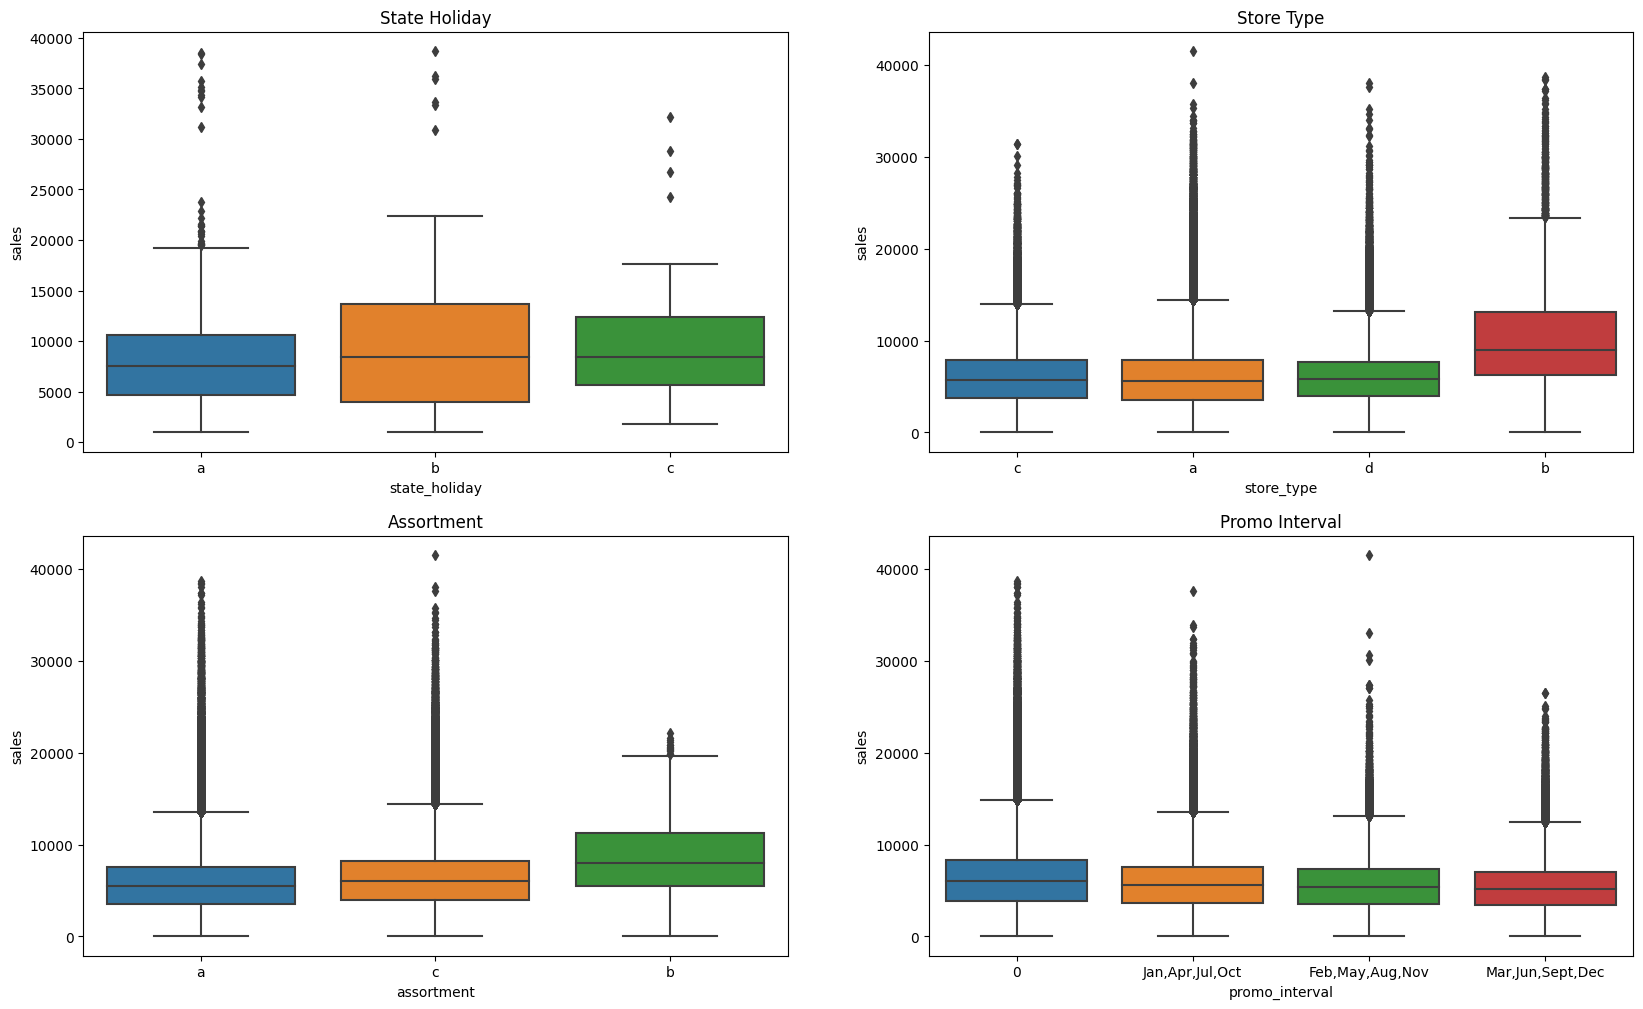

In [14]:
# Set figure size
plt.figure(figsize=(20, 12))

# Filters
aux1 = df1.loc[((df1['sales'] > 0) & (df1['state_holiday'] != '0')), :]

# State Holiday
plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x='state_holiday', y='sales', data=aux1)
ax1.set_title('State Holiday')

# Store Type
plt.subplot(2, 2, 2)
ax2 = sns.boxplot(x='store_type', y='sales', data=df1)
ax2.set_title('Store Type')

# Assortment
plt.subplot(2, 2, 3)
ax3 = sns.boxplot(x='assortment', y='sales', data=df1)
ax3.set_title('Assortment')

# Promo Interval
plt.subplot(2, 2, 4)
ax4 = sns.boxplot(x='promo_interval', y='sales', data=df1)
ax4.set_title('Promo Interval')

plt.show()

# 2. FEATURE ENGINEERING

In [15]:
df2 = df1.copy()

## 2.1 Hypothesis Mindmap

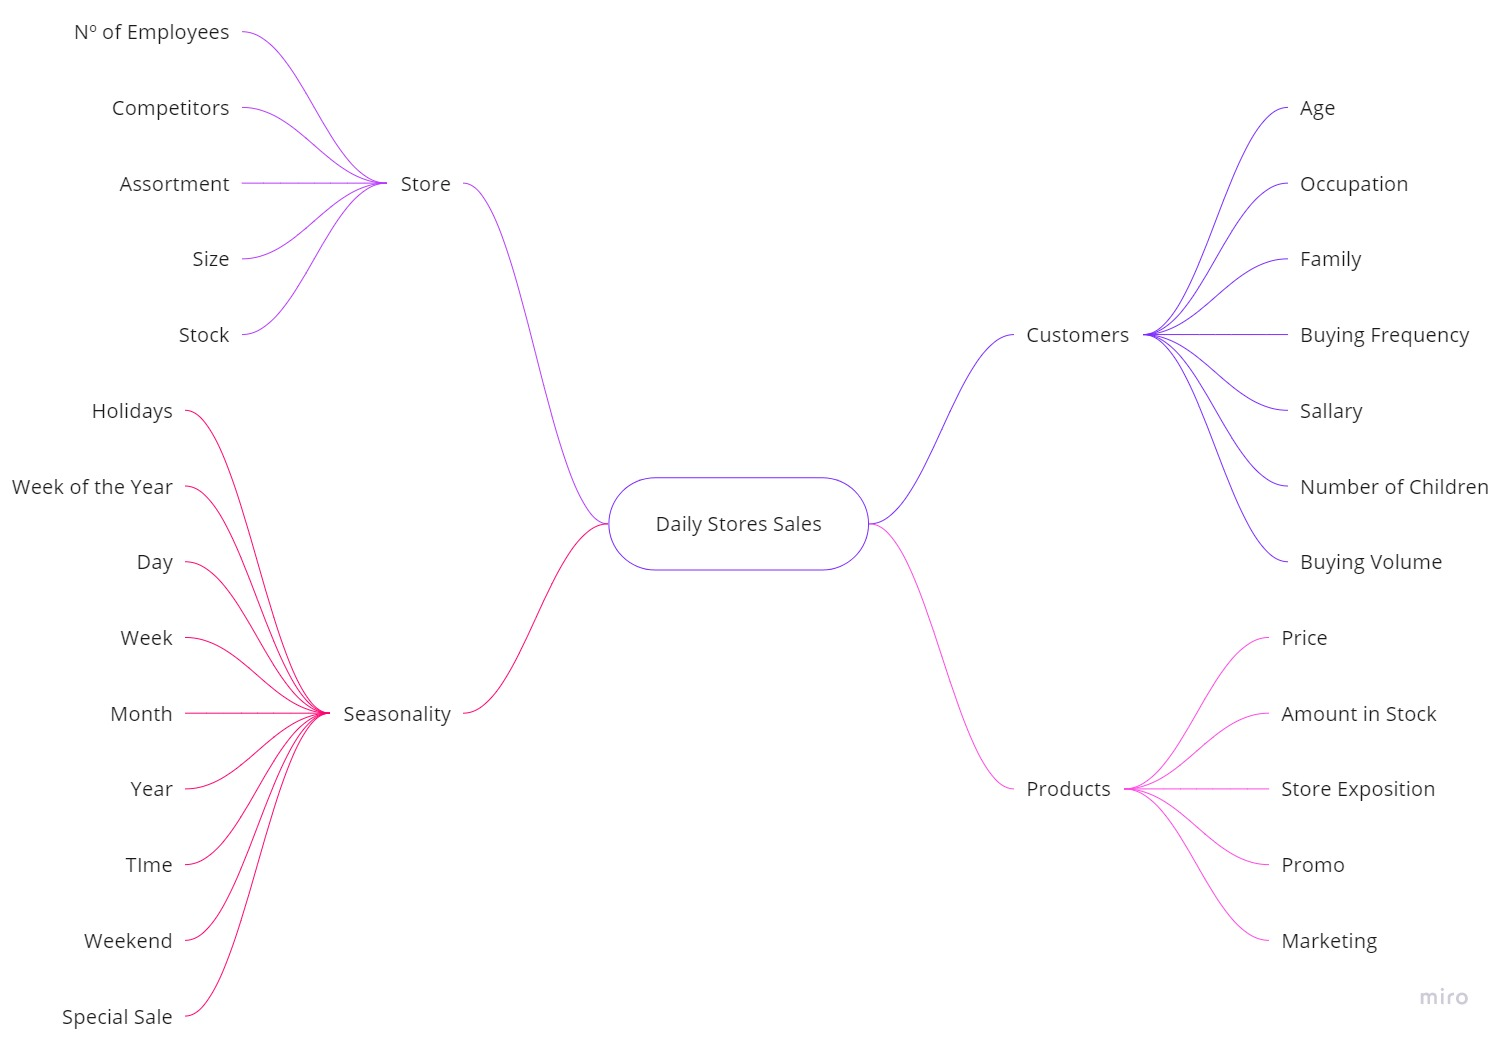

In [16]:
Image('img/mindmap.jpg')

## 2.2 Creating Hypothesis

### 2.2.1 Stores

1. Stores with more employees should sell more.
2. Stores with more stock capacity should sell more.
3. Larger stores should sell more.
4. Stores with a larger assortment should sell more.
5. Stores with closer competitors should sell less.
6. Stores with longer-term competitors should sell more.
7. Stores with more stock capacity should sell more.

### 2.2.2 Products

1. Stores that invest more in marketing should sell more.
2. Stores with more product exposure should sell more.
3. Stores with lower priced products should sell more.
5. Stores with more aggressive promotions (larger discounts) should sell more.
6. Stores with longer promotions should sell more.
7. Stores with more promotion days should sell more.
8. Stores with more consecutive promotions should sell more.

### 2.2.3 Seasonality

1. Stores open during the Christmas holiday should sell more.
2. Stores should sell more over the years.
3. Stores should sell more in the second half of the year.
4. Stores should sell more after the 10th of each month.
5. Stores should sell less on weekends.
6. Stores should sell less during school holidays.days.

## 2.3 Prioritized Hypothesis

1. Stores with a larger assortment should sell more.
2. Stores with closer competitors should sell less.
3. Stores with longer-term competitors should sell more.
4. Stores with longer promotions should sell more.
5. Stores with more promotion days should sell more.
6. Stores with more consecutive promotions should sell more.
7. Stores open during the Christmas holiday should sell more.
8. Stores should sell more over the years.
9. Stores should sell more in the second half of the year.
10. Stores should sell more after the 10th day of each month.
11. Stores should sell less on weekends.
12. Stores should sell less during school holidays.

## 2.4 Feature Engineering

In [17]:
# year
df2['year'] = df1['date'].dt.year

# month
df2['month'] = df1['date'].dt.month

# week
df2['week'] = df1['date'].dt.isocalendar().week

# day
df2['day'] = df1['date'].dt.day

# year-week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Competition since date
df2['competition_since_date'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], 
                                                                 month=x['competition_open_since_month'], 
                                                                 day=1), axis=1)

# Number of months in competition
df2['competition_number_months'] = (((df2['date'] - df2['competition_since_date']).dt.days)/30).astype(int)

# Promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))

# Number of weeks in promo
df2['promo_number_weeks'] = (((df2['date'] - df2['promo_since']).dt.days)/7).astype(int)

# Assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x== 'b' else 'extended')

# State Holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 
                                                            'easter_holiday' if x == 'b' else 
                                                            'christmas' if x == 'c' else 
                                                            'no_holiday')

# 3 FEATURE FILTERING

In [18]:
df3 = df2.copy()

## 3.1 Columsn Description

- **store** - a unique Id for each store
- **day_of_week** - The ordinal day of week
- **date** - The date of the register (YYYY-MM-DD)
- **sales** - the turnover for any given day (this is what you are predicting)
- **customers** - the number of customers on a given day
- **open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **promo** - indicates whether a store is running a promo on that dayPromo
- **state_holiday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.  Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **school_holiday** - indicates if the (Store, Date) was affected by the closure of public schools
- **store_type** - differentiates between 4 different store models: a, b, c, d
- **assorment** - describes an assortment level: a = basic, b = extra, c = extended
- **competition_distance** - distance in meters to the nearest competitor store
- **competition_open_since_month** - The number of the month in which since there's a competition running for that store
- **competition_open_since_year** - The number of the year in which since there's a competition running for that store
- **promo2** - Promo2 is a continuing and consecutive promotion for some stores:  0 = store is not participating, 1 = store is participating
- **promo2_since_week** - The number of the week of the year since the promo2 is running
- **promo2_since_year** - The number of the year since promo2 is running
- **promo_interval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.
- **month_map** - The month name of the date
- **is_promo** - Flags if whether the current month is in promo interval. When it is, we can interpretate that promo2 is active on that date
- **year, month, week, day** - The derivated time granularity of each date**
- **year_week**- The week of the year and the year
- **competition_since_date** - The date of since when there's a competition (YYYY-MM-DD)- **'competition_number_month** - The number of months of since there's a near competitor to that store
- **'promo_sice** - The date of since there's a second promo on that store
- **'promo_number_week** - The number of weeks since there's a second promo on that store


## 3.2 Rows Filtering

In [19]:
# Rows before filtering
len(df3)

1017209

In [20]:
conditions = (df3['open'] != 0) & (df3['sales'] > 0)
df3 = df3[conditions].reset_index(drop=True)

In [21]:
# Rows after filtering
len(df3)

844338

## 3.3 Columns Selection

In [22]:
cols = ['customers', 'open', 'month_map', 'promo_interval']
df3.drop(columns=cols, axis=1, inplace=True)

In [23]:
df3.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,week,day,year_week,competition_since_date,competition_number_months,promo_since,promo_number_weeks
0,1,5,2015-07-31,5263,1,no_holiday,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,no_holiday,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,no_holiday,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,no_holiday,1,c,extended,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,no_holiday,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 4. EXPLORATORY DATA ANALYSIS (EDA)

In [24]:
df4 = df3.copy()

## 4.1 Univariate Analysis

In [130]:
np.mean(df4['sales'])

6955.959133664481

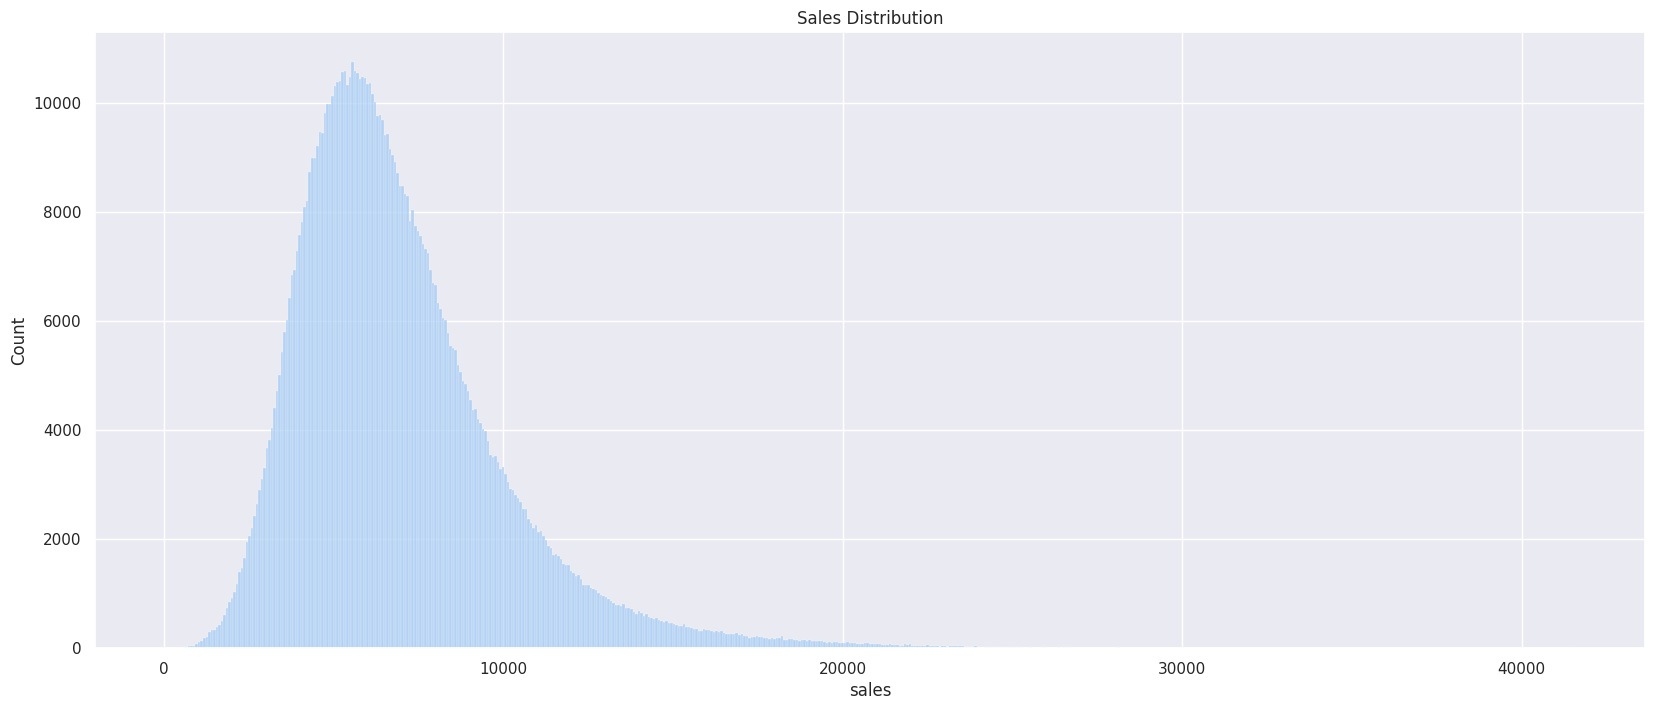

In [134]:
# Plot sales distribution
ax1 = sns.histplot(df4['sales'], legend=True)
ax1.set_title('Sales Distribution')
plt.show()

In [142]:
df4.select_dtypes(include=['int64', 'float64'])

,store,day_of_week,sales,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,competition_number_months,promo_number_weeks
0,1,5,5263,1,1,1270.0,9,2008,0,31,2015,0,2015,7,31,84,0
1,2,5,6064,1,1,570.0,11,2007,1,13,2010,1,2015,7,31,94,279
2,3,5,8314,1,1,14130.0,12,2006,1,14,2011,1,2015,7,31,105,226
3,4,5,13995,1,1,620.0,9,2009,0,31,2015,0,2015,7,31,71,0
4,5,5,4822,1,1,29910.0,4,2015,0,31,2015,0,2015,7,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,682,2,3375,0,1,150.0,9,2006,0,1,2013,0,2013,1,1,77,0
844334,733,2,10765,0,1,860.0,10,1999,0,1,2013,0,2013,1,1,161,0
844335,769,2,5035,0,1,840.0,1,2013,1,48,2012,1,2013,1,1,0,6
844336,948,2,4491,0,1,1430.0,1,2013,0,1,2013,0,2013,1,1,0,0


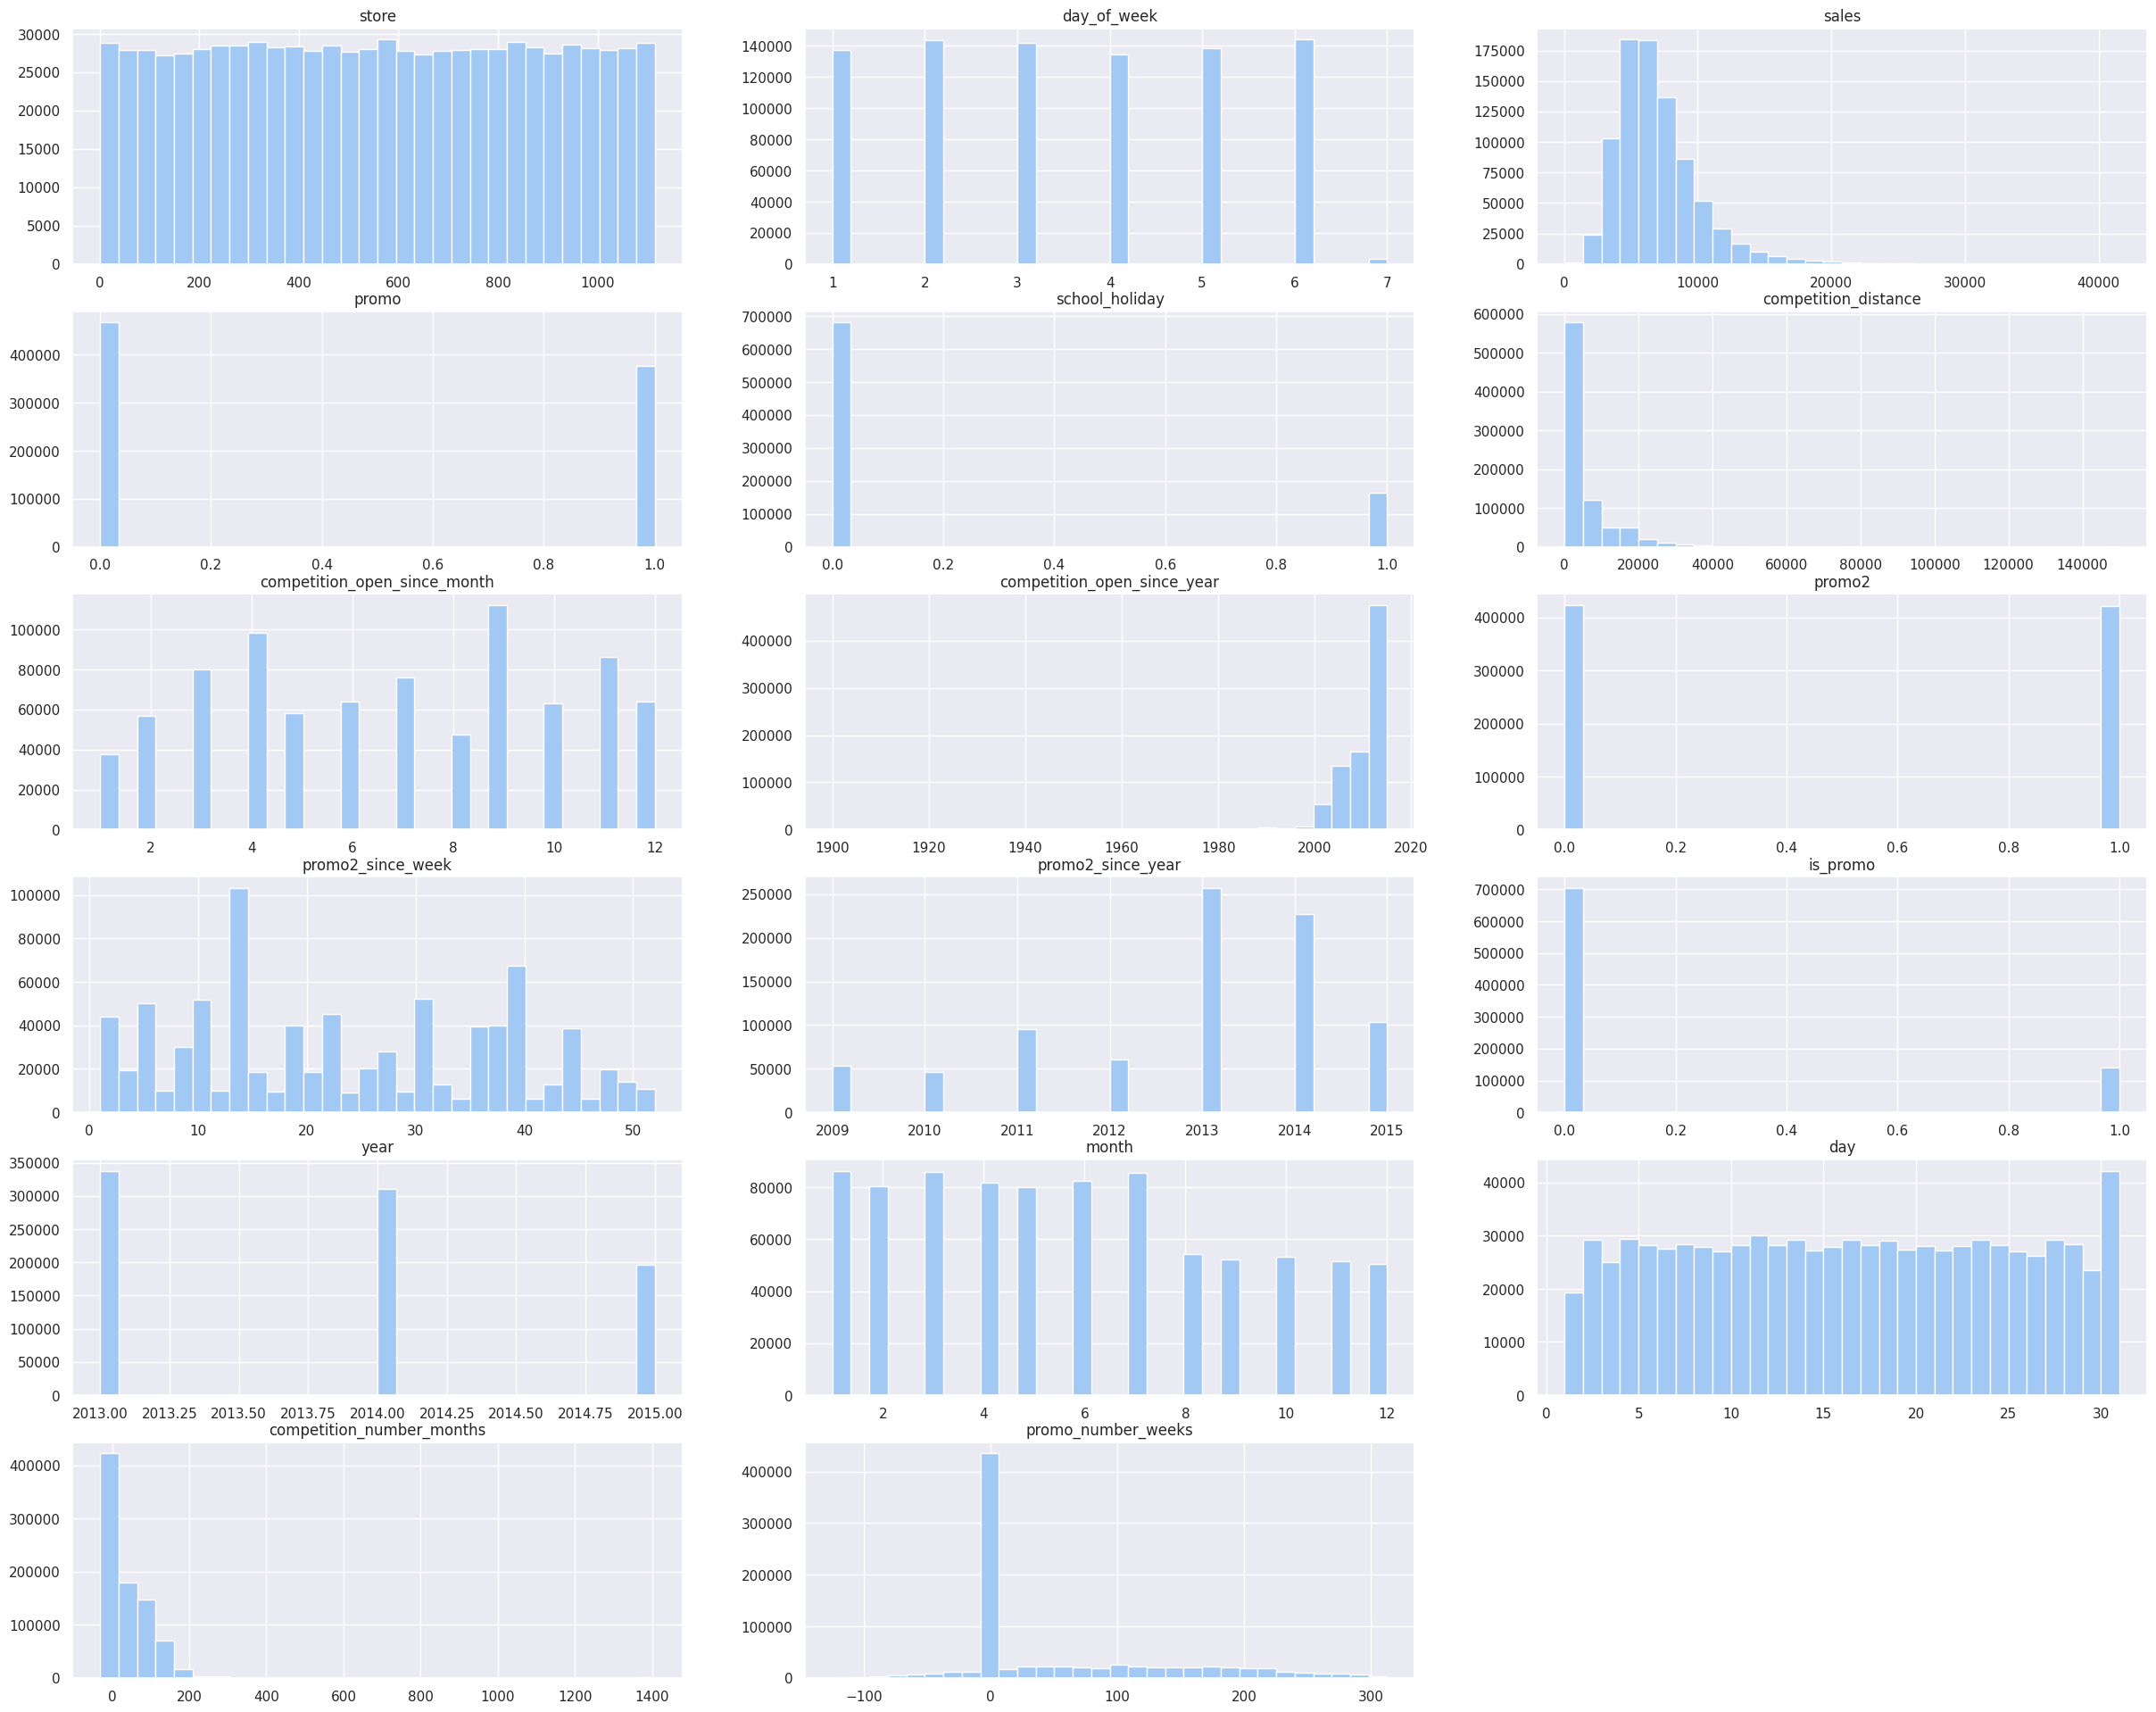

In [145]:
# Plot numerical attributes

num_att = df4.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(30, 24))

cols = num_att.columns.to_list()

for i in range(0, len(cols)):
    ax = plt.subplot(6, 3, i+1)
    ax.set_title(cols[i])

    num_att[cols[i]].hist(bins=30)

plt.show()

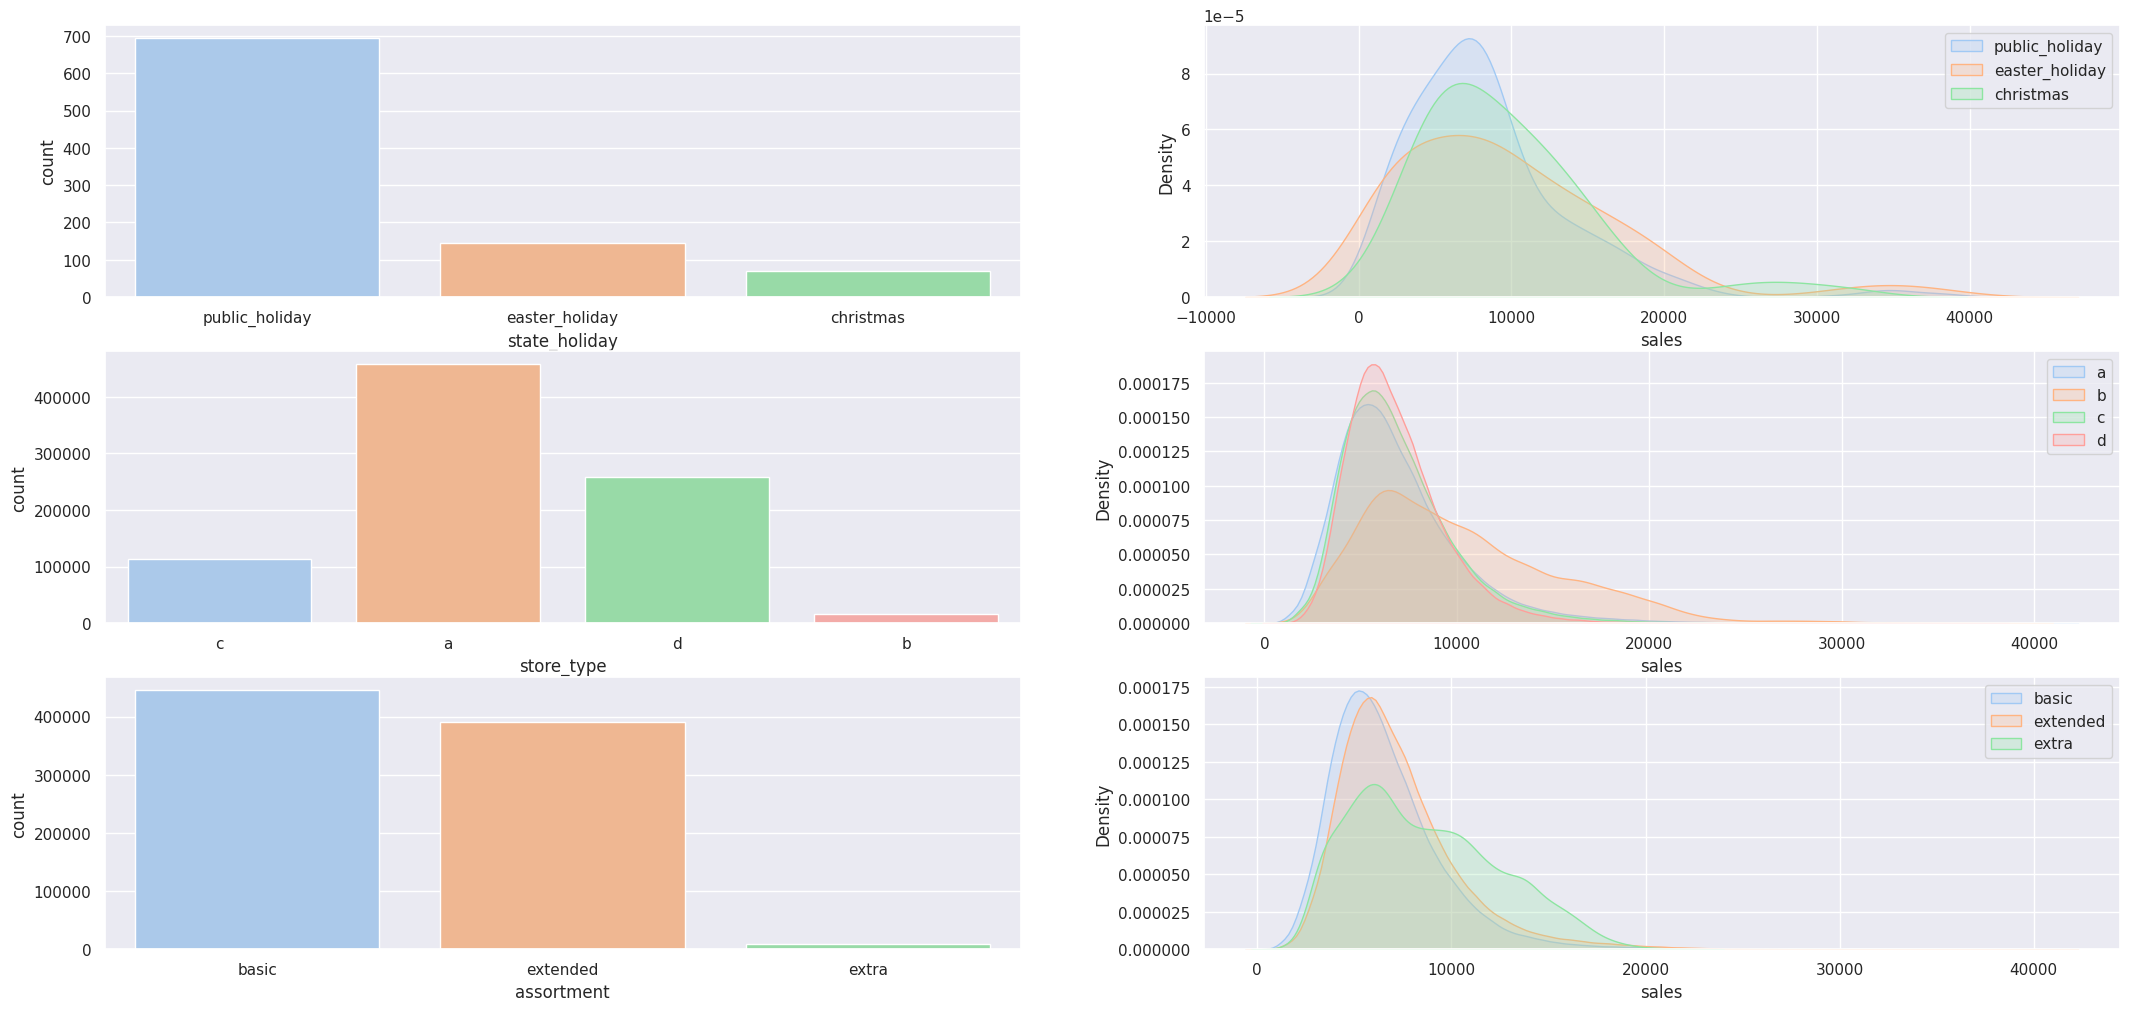

In [146]:
# Plot categorical attibutes
plt.figure(figsize=(26, 12))

# State holiday
a = df4[df4['state_holiday'] != 'no_holiday']

plt.subplot(3, 2, 1)
sns.countplot(x=a['state_holiday'])

plt.subplot(3, 2, 2)
sns.kdeplot(df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', fill=True)
sns.kdeplot(df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', fill=True)
plt.legend(labels=['public_holiday', 'easter_holiday', 'christmas'])

# Store type
plt.subplot(3, 2, 3)
sns.countplot(x= df4['store_type'])

plt.subplot(3, 2, 4)
sns.kdeplot(df4[df4['store_type'] == 'a']['sales'], label='a', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'b']['sales'], label='b', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'c']['sales'], label='c', fill=True)
sns.kdeplot(df4[df4['store_type'] == 'd']['sales'], label='d', fill=True)
plt.legend(labels=['a', 'b', 'c', 'd'])

# Assortment
plt.subplot(3, 2, 5)
sns.countplot(x= df4['assortment'])

plt.subplot(3, 2, 6)
sns.kdeplot(df4[df4['assortment'] == 'basic']['sales'], label='basic', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extended']['sales'], label='extended', fill=True)
sns.kdeplot(df4[df4['assortment'] == 'extra']['sales'], label='extra', fill=True)
plt.legend(labels=['basic', 'extended', 'extra']);

## 4.2 Bivariate Analysis

## 4.2 Multivariate Analysis

## 4.4 Hypothesis Validation